In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


In [3]:
!kaggle datasets download -d hafiznouman786/potato-plant-diseases-data

Dataset URL: https://www.kaggle.com/datasets/hafiznouman786/potato-plant-diseases-data
License(s): CC0-1.0
 82% 62.0M/75.7M [00:00<00:00, 97.0MB/s]
100% 75.7M/75.7M [00:00<00:00, 86.4MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/potato-plant-diseases-data.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import os
import random
from shutil import copyfile
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array,array_to_img
import numpy as np
import matplotlib.pyplot as plt

In [6]:
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.2
)

In [7]:
len(os.listdir("/content/PotatoPlants/Potato___healthy"))

152

In [8]:
dir = "/content/PotatoPlants/Potato___healthy"

image_count = 152

for i in os.listdir(dir):
    if image_count >= 1000:
        break

    img_path = os.path.join(dir,i)
    img = load_img(img_path,target_size=(224,224))
    img_array = img_to_array(img)

    x = np.expand_dims(img_array,axis=0)

    i = 0
    for batch in datagen.flow(x, batch_size=1, save_to_dir=dir, save_prefix='aug', save_format='jpeg'):
        i += 1
        image_count += 1
        if i >= 6:
            break  # We only need one augmented image per input image to increase the count
        if image_count >= 1000:
            break

In [9]:
len(os.listdir("/content/PotatoPlants/Potato___healthy"))

962

In [10]:
try:
    os.mkdir("/content/PotatoPlants/train")
    os.mkdir("/content/PotatoPlants/val")
    os.mkdir("/content/PotatoPlants/test")

    os.mkdir("/content/PotatoPlants/train/Potato___Early_blight")
    os.mkdir("/content/PotatoPlants/train/Potato___healthy")
    os.mkdir("/content/PotatoPlants/train/Potato___Late_blight")

    os.mkdir("/content/PotatoPlants/val/Potato___Early_blight")
    os.mkdir("/content/PotatoPlants/val/Potato___healthy")
    os.mkdir("/content/PotatoPlants/val/Potato___Late_blight")

    os.mkdir("/content/PotatoPlants/test/Potato___Early_blight")
    os.mkdir("/content/PotatoPlants/test/Potato___healthy")
    os.mkdir("/content/PotatoPlants/test/Potato___Late_blight")
except:
    pass

In [11]:
train_early_blight = "/content/PotatoPlants/train/Potato___Early_blight"
val_early_blight = "/content/PotatoPlants/val/Potato___Early_blight"
test_early_blight = "/content/PotatoPlants/test/Potato___Early_blight"

train_healthy = "/content/PotatoPlants/train/Potato___healthy"
val_healthy = "/content/PotatoPlants/val/Potato___healthy"
test_healthy = "/content/PotatoPlants/test/Potato___healthy"

train_late_blight = "/content/PotatoPlants/train/Potato___Late_blight"
val_late_blight = "/content/PotatoPlants/val/Potato___Late_blight"
test_late_blight = "/content/PotatoPlants/test/Potato___Late_blight"

In [12]:
def split_data(main_dir,train_dir,val_dir,test_dir,train_split=0.8,include_test=False,shuffle=True):

    files = []
    for i in os.listdir(main_dir):
        files.append(i)


    if shuffle:
        random.shuffle(files)

    split = int(len(files) * train_split)

    train_files = files[:split]
    if include_test:
        half = (len(files) - split) // 2
        val_files = files[split : split + half]
        test_files = files[split + half : ]
    else:
        val_files = files[split:]

    for i in train_files:
        copyfile(os.path.join(main_dir,i), os.path.join(train_dir,i))

    for i in val_files:
        copyfile(os.path.join(main_dir,i), os.path.join(val_dir,i))

    if include_test:
        for i in test_files:
            copyfile(os.path.join(main_dir,i), os.path.join(test_dir,i))

    print("Train :",len(os.listdir(train_dir)))
    print("Validation :",len(os.listdir(val_dir)))
    if include_test:
        print("Test :",len(os.listdir(test_dir)))

In [13]:
split_data(
    main_dir = "/content/PotatoPlants/Potato___Early_blight",
    train_dir = train_early_blight,
    val_dir = val_early_blight,
    test_dir = test_early_blight,
    train_split = 0.8,
    include_test = True
)
split_data(
    main_dir = "/content/PotatoPlants/Potato___healthy",
    train_dir = train_healthy,
    val_dir = val_healthy,
    test_dir = test_healthy,
    train_split = 0.8,
    include_test = True
)
split_data(
    main_dir = "/content/PotatoPlants/Potato___Late_blight",
    train_dir = train_late_blight,
    val_dir = val_late_blight,
    test_dir = test_late_blight,
    train_split = 0.8,
    include_test = True
)

Train : 800
Validation : 100
Test : 100
Train : 769
Validation : 96
Test : 97
Train : 800
Validation : 100
Test : 100


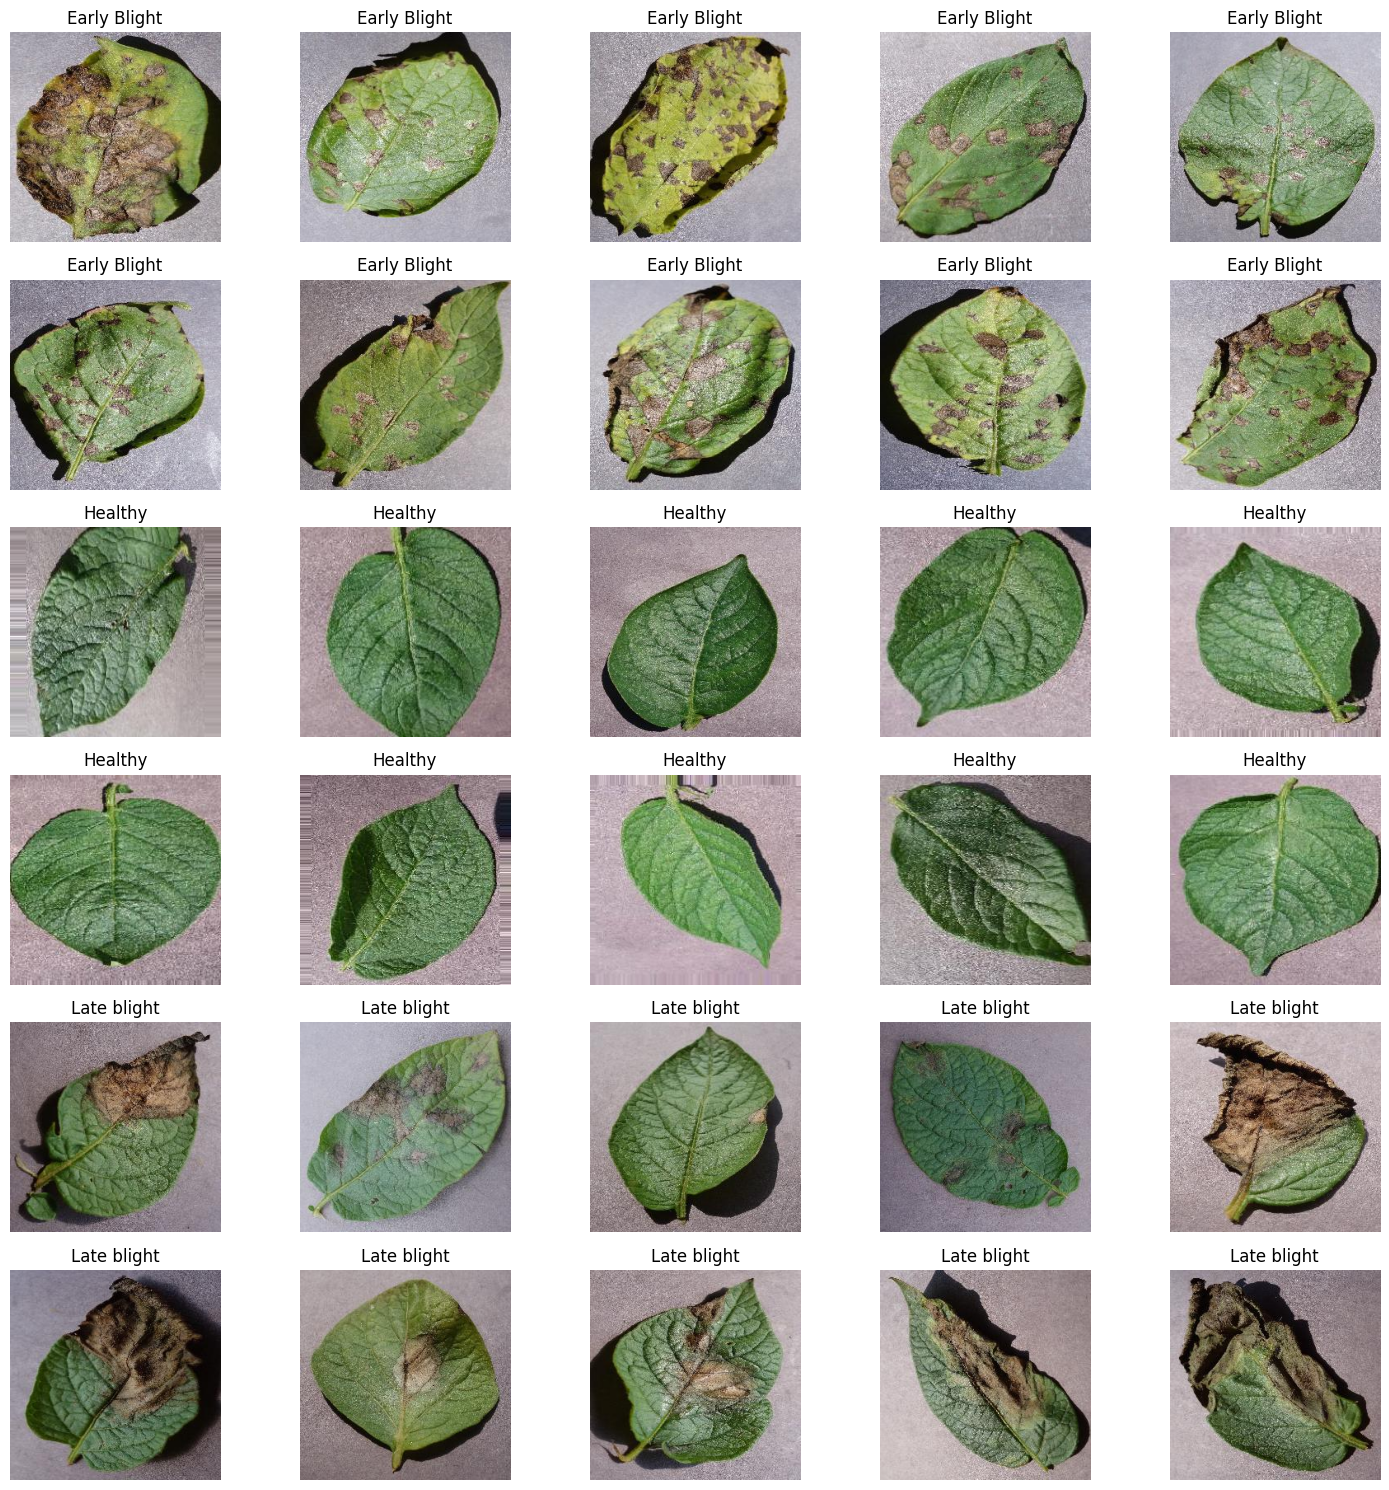

In [14]:
fig, ax = plt.subplots(ncols = 5, nrows = 6,figsize=(15,15))

images = os.listdir(train_early_blight)[:10] + os.listdir(train_healthy)[:10] + os.listdir(train_late_blight)[:10]
labels = ["Early Blight"]*10 + ["Healthy"]*10 + ["Late blight"]*10

for i in range(30):

  if i < 10:
    image = os.path.join(train_early_blight, images[i])
  elif i < 20:
    image = os.path.join(train_healthy, images[i])
  else:
    image = os.path.join(train_late_blight, images[i])

  image = load_img(image)

  ax[i // 5][i % 5].imshow(image)
  ax[i // 5][i % 5].set_title(labels[i])
  ax[i // 5][i % 5].axis("off")

plt.tight_layout()
plt.show()


In [15]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.2
)
val_datagen = ImageDataGenerator(
    rescale = 1./255
)

In [16]:
train_gen = train_datagen.flow_from_directory(
    directory = "/content/PotatoPlants/train",
    target_size = (224,224),
    class_mode = "categorical",
    batch_size = 32
)

val_gen = val_datagen.flow_from_directory(
    directory = "/content/PotatoPlants/val",
    target_size = (224,224),
    class_mode = "categorical",
    batch_size = 32
)
test_gen = val_datagen.flow_from_directory(
    directory = "/content/PotatoPlants/test",
    target_size = (224,224),
    class_mode = "categorical",
    batch_size = 32
)


Found 2369 images belonging to 3 classes.
Found 296 images belonging to 3 classes.
Found 297 images belonging to 3 classes.


In [17]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,BatchNormalization,Dropout,ReLU,LeakyReLU
from keras.regularizers import L1,L2
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

In [29]:
early_stopping = EarlyStopping(monitor = "val_loss",patience = 15,min_delta=0.1)

In [44]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(224, 224, 3), activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(64, activation='relu',kernel_regularizer=L2(0.01)))
model.add(Dropout(0.4))
model.add(Dense(20, activation="relu"))

model.add(Dense(3, activation='softmax'))

In [45]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 222, 222, 64)      1792      
                                                                 
 dropout_8 (Dropout)         (None, 222, 222, 64)      0         
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 111, 111, 64)      0         
 ng2D)                                                           
                                                                 
 conv2d_12 (Conv2D)          (None, 109, 109, 64)      36928     
                                                                 
 dropout_9 (Dropout)         (None, 109, 109, 64)      0         
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 54, 54, 64)        0         
 ng2D)                                                

In [46]:
model.compile(optimizer=Adam(learning_rate=0.001),loss="categorical_crossentropy",metrics=['accuracy'])

In [47]:
history = model.fit(test_gen,validation_data=val_gen,epochs=100,callbacks=[early_stopping])

Epoch 1/100
10/10 [==============================] - 10s 870ms/step - loss: 2.1459 - accuracy: 0.3131 - val_loss: 1.9335 - val_accuracy: 0.3818
Epoch 2/100
10/10 [==============================] - 8s 796ms/step - loss: 1.8055 - accuracy: 0.3502 - val_loss: 1.6574 - val_accuracy: 0.4493
Epoch 3/100
10/10 [==============================] - 8s 800ms/step - loss: 1.5561 - accuracy: 0.3569 - val_loss: 1.4674 - val_accuracy: 0.3378
Epoch 4/100
10/10 [==============================] - 8s 796ms/step - loss: 1.4150 - accuracy: 0.3367 - val_loss: 1.3501 - val_accuracy: 0.3378
Epoch 5/100
10/10 [==============================] - 8s 819ms/step - loss: 1.3148 - accuracy: 0.3603 - val_loss: 1.2754 - val_accuracy: 0.3378
Epoch 6/100
10/10 [==============================] - 8s 797ms/step - loss: 1.2446 - accuracy: 0.3535 - val_loss: 1.2242 - val_accuracy: 0.3378
Epoch 7/100
10/10 [==============================] - 8s 799ms/step - loss: 1.2009 - accuracy: 0.3266 - val_loss: 1.1844 - val_accuracy: 0.476

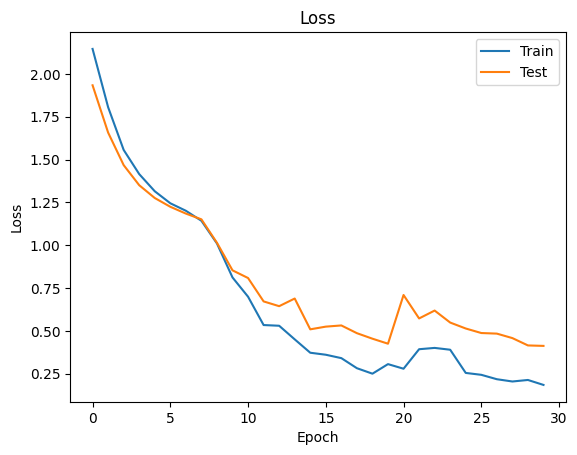

In [48]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train',"Test"])
plt.show()

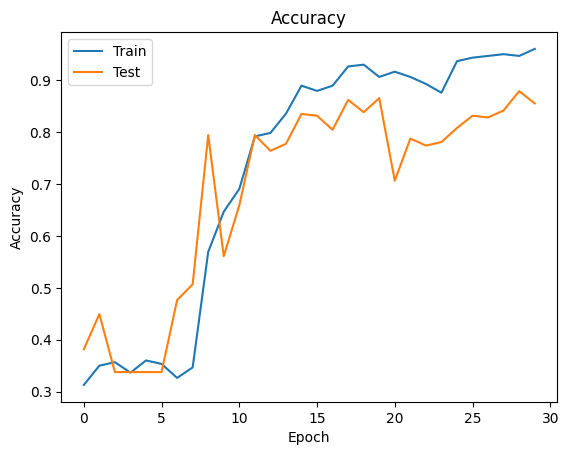

In [49]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train',"Test"])
plt.show()

In [50]:
model.evaluate(test_gen)

10/10 [==============================] - 1s 120ms/step - loss: 0.1970 - accuracy: 0.9966


[0.19697509706020355, 0.996632993221283]